[Clicke Here](https://www.youtube.com/watch?v=Edhv7-4t0lc) to see the video tutorial
## Import Necessary Libraries

In [65]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [66]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'Shape of Data: {X_train.shape}')
print(f'No of classes: {len(np.unique(y_train))}')

Shape of Data: (60000, 28, 28)
No of classes: 10


## Normalize Data

In [67]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [68]:
print(y_train[0])

5


## Define the model


In [69]:
def get_model(input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = input_shape))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(10)) # recommnendation is do not use softmax function in this layer
    
    return model

In [70]:
model = get_model((28, 28))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Loss & Optimizers

In [71]:
# from_logits should be true if activation is not given in the last layer
# if target is one hot encoded then use CategoricalCrossentropy
learning_rate = 0.001

loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = keras.optimizers.Adam(lr = learning_rate)
metrics = ['accuracy']

In [72]:
model.compile(
    loss = loss,
    optimizer = optimizer,
    metrics = metrics
)

## Training

In [75]:
batch_size = 64
epochs = 10

In [76]:
hist = model.fit(X_train, y_train, batch_size = batch_size, shuffle = True, verbose = 2, epochs = epochs)

Epoch 1/10
938/938 - 1s - loss: 0.0450 - accuracy: 0.9864
Epoch 2/10
938/938 - 1s - loss: 0.0361 - accuracy: 0.9894
Epoch 3/10
938/938 - 1s - loss: 0.0287 - accuracy: 0.9920
Epoch 4/10
938/938 - 1s - loss: 0.0247 - accuracy: 0.9931
Epoch 5/10
938/938 - 1s - loss: 0.0190 - accuracy: 0.9948
Epoch 6/10
938/938 - 1s - loss: 0.0161 - accuracy: 0.9955
Epoch 7/10
938/938 - 1s - loss: 0.0133 - accuracy: 0.9967
Epoch 8/10
938/938 - 1s - loss: 0.0117 - accuracy: 0.9969
Epoch 9/10
938/938 - 1s - loss: 0.0087 - accuracy: 0.9980
Epoch 10/10
938/938 - 1s - loss: 0.0084 - accuracy: 0.9979


## Evaluate

In [77]:
model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 0s - loss: 0.0822 - accuracy: 0.9795


[0.08224084973335266, 0.9794999957084656]

## Predictions

In [78]:
predictions = tf.nn.softmax(model.predict(X_test, batch_size = batch_size))
predictions = predictions[1:25]
label = np.argmax(predictions, axis = 1) # predictions for first 5 images
print(label)

[2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


## Plot the graph

In [80]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


## Plot for accuracy

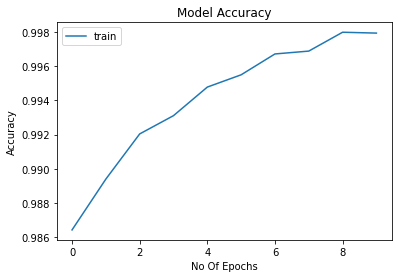

In [81]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train'], loc = 'upper left')
plt.show()


##